In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC , SVC
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs 


In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
Y = iris['target']
                 

#X, Y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.40) 
setosa_or_versicolor = (Y == 0) | (Y == 1)
X = X[setosa_or_versicolor]
Y = Y[setosa_or_versicolor]
svm_clf = SVC(kernel="linear", C=10)
svm_clf.fit(X,Y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [3]:
svm_clf.predict([[5.7,8.9]])

array([1])

In [4]:
#W=svm_clf.named_steps['linear_SVC'].coef_
W=svm_clf.coef_
W = W[0]
b = svm_clf.intercept_
b=b[0]
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [5]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

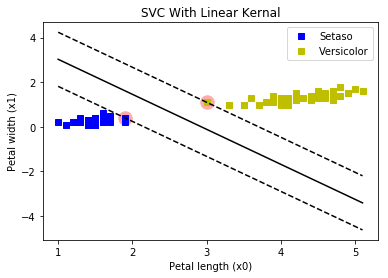

In [6]:
plt.xlabel('Petal length (x0)')
plt.ylabel('Petal width (x1)')
plt.title('SVC With Linear Kernal')
plt.plot(X[:,0][Y==0],X[:,1][Y==0],'bs',label="Setaso")
plt.plot(X[:,0][Y==1],X[:,1][Y==1],'ys',label="Versicolor")

plt.legend()

min = np.amin(X[:,0])
max = np.amax(X[:,0])

X_0 = np.linspace(min,max,X.shape[0])
X_1 = -W[0]/ W[1] * X_0 - b/W[1]
# Calculating margins / Width length so that we plot the Decision Margins
margin = 1/W[1]

# Substract the margin from the main Decision Boundry , we get Lower Bound
gutter_down = X_1 - margin

# Add the margin from the main Decision Boundry , we get Upper Bound
gutter_up = X_1 + margin

plt.plot(X_0,X_1,'k-')
plt.plot(X_0,gutter_down,'k--')
plt.plot(X_0,gutter_up,'k--')

svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.show()

In [12]:
iris = datasets.load_iris()

svm_clf =Pipeline( (
    ('scalar', StandardScaler()),
    ('linear_SVC',LinearSVC(C=10,loss='hinge',random_state=42))
))
svm_clf.fit(X,Y)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_SVC', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [13]:
print(svm_clf.named_steps['linear_SVC'].coef_)
print(svm_clf.named_steps['linear_SVC'].intercept_)

[[1.0536456  1.09903032]]
[0.28474027]


let's unscale the weights since we have used the StandardScaler

In [18]:
scale = svm_clf.named_steps['scalar'].scale_
mean = svm_clf.named_steps['scalar'].mean_

b = svm_clf.named_steps['linear_SVC'].intercept_ = np.array([svm_clf.named_steps['linear_SVC'].decision_function([-mean/scale])])
W = svm_clf.named_steps['linear_SVC'].coef_ = np.array([svm_clf.named_steps['linear_SVC'].coef_[0] / scale])

W = W[0]
t = Y * 2 - 1

support_vectors_idx = (t * (X.dot(W) + b) < 1).ravel()

svm_clf.named_steps['linear_SVC'].support_vectors_ = X[support_vectors_idx]
print(W)


[0.3511911  6.18099844]


In [15]:
# Convert to unscaled parameters
b = svm_clf.named_steps['linear_SVC'].decision_function([-svm_clf.named_steps['scalar'].mean_ / svm_clf.named_steps['scalar'].scale_])

W = svm_clf.named_steps['linear_SVC'].coef_[0] / svm_clf.named_steps['scalar'].scale_

svm_clf.intercept_ = np.array([b])

svm_clf.coef_ = np.array([W])

# Find support vectors (LinearSVC does not do this automatically)
t = Y * 2 - 1

support_vectors_idx = (t * (X.dot(W) + b) < 1).ravel()

svm_clf.named_steps['linear_SVC'].support_vectors_ = X[support_vectors_idx]

[1.         1.04141414 1.08282828 1.12424242 1.16565657 1.20707071
 1.24848485 1.28989899 1.33131313 1.37272727 1.41414141 1.45555556
 1.4969697  1.53838384 1.57979798 1.62121212 1.66262626 1.7040404
 1.74545455 1.78686869 1.82828283 1.86969697 1.91111111 1.95252525
 1.99393939 2.03535354 2.07676768 2.11818182 2.15959596 2.2010101
 2.24242424 2.28383838 2.32525253 2.36666667 2.40808081 2.44949495
 2.49090909 2.53232323 2.57373737 2.61515152 2.65656566 2.6979798
 2.73939394 2.78080808 2.82222222 2.86363636 2.90505051 2.94646465
 2.98787879 3.02929293 3.07070707 3.11212121 3.15353535 3.19494949
 3.23636364 3.27777778 3.31919192 3.36060606 3.4020202  3.44343434
 3.48484848 3.52626263 3.56767677 3.60909091 3.65050505 3.69191919
 3.73333333 3.77474747 3.81616162 3.85757576 3.8989899  3.94040404
 3.98181818 4.02323232 4.06464646 4.10606061 4.14747475 4.18888889
 4.23030303 4.27171717 4.31313131 4.35454545 4.3959596  4.43737374
 4.47878788 4.52020202 4.56161616 4.6030303  4.64444444 4.6858585

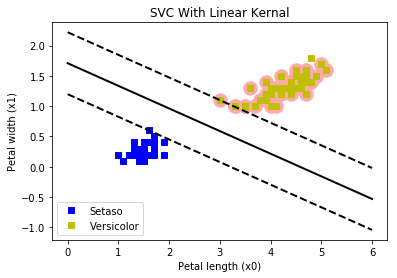

In [16]:
plt.xlabel('Petal length (x0)')
plt.ylabel('Petal width (x1)')
plt.title('SVC With Linear Kernal')